# CA4

### Imports

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split


### Reading data

In [17]:

df = pd.read_csv('assets/train.csv')
df = df.drop(df.columns[0], axis=1)
df.set_index('index', inplace=True)


### Data exploration and visualisation

In [18]:
# to get all the columns
pd.set_option('display.max_columns', None)
              
# Print the mean, median, and standard deviation of each column
print(df.head())
print(df.describe())


       AFP (ng/mL)    ALP (U/L)   ALT (U/L)  AST (U/L)  Age  Albumin (g/dL)  \
index                                                                         
1124     13.571425  1653.138489   40.405592  45.598427    4        4.477126   
1188     13.649342  1940.518305   21.336986  34.064095   55        3.190724   
530      10.898943  1557.369920   29.665496  16.044488   30        4.506351   
686      13.872275  1273.840525  142.418649  64.204257    0        3.665655   
296      10.102457  1461.622515   22.437303  23.940205   59        4.005109   

      Alcohol_Use (yes/no)  Bilirubin (mg/dL)  CRP (mg/L) Diabetes (yes/no)  \
index                                                                         
1124                   yes           0.541997    1.002121                no   
1188                   yes           1.199063    0.582746                no   
530                     no           0.740952    1.670375                no   
686                    yes           1.939879    1.

### Data cleaning

#### Turn categorical variables into numerical

In [19]:
# Turn the Categorical variables into number variables
gender_mapping = {'MALE': 0, 'FEMALE': 1}
df['Gender'] = df['Gender'].map(gender_mapping)

yes_no_mapping = {'no': 0, 'yes': 1}
df['Alcohol_Use (yes/no)'] = df['Alcohol_Use (yes/no)'].map(yes_no_mapping)
df['Diabetes (yes/no)'] = df['Diabetes (yes/no)'].map(yes_no_mapping)
df['Obesity (yes/no)'] = df['Obesity (yes/no)'].map(yes_no_mapping)

# Turn classes into numbers
label_to_number = LabelEncoder()
y = label_to_number.fit_transform(df['Diagnosis']) # ".fit_transform" is short for ".fit" and then ".transform"
# Need to convert back to data frame because the encoder returns a numpy array
df['Diagnosis'] = y
print(df.head())



       AFP (ng/mL)    ALP (U/L)   ALT (U/L)  AST (U/L)  Age  Albumin (g/dL)  \
index                                                                         
1124     13.571425  1653.138489   40.405592  45.598427    4        4.477126   
1188     13.649342  1940.518305   21.336986  34.064095   55        3.190724   
530      10.898943  1557.369920   29.665496  16.044488   30        4.506351   
686      13.872275  1273.840525  142.418649  64.204257    0        3.665655   
296      10.102457  1461.622515   22.437303  23.940205   59        4.005109   

       Alcohol_Use (yes/no)  Bilirubin (mg/dL)  CRP (mg/L)  Diabetes (yes/no)  \
index                                                                           
1124                      1           0.541997    1.002121                  0   
1188                      1           1.199063    0.582746                  0   
530                       0           0.740952    1.670375                  0   
686                       1           1.9

#### Remove missing values and outliers



In [20]:
# Check for nan values
print(df.isnull().values.any())

for i in df.columns:
    z_scores_clean = (df[i] - np.mean(df[i])) / np.std(df[i])    
    df = df[np.abs(z_scores_clean) < 3]


print(df.describe())


False
       AFP (ng/mL)    ALP (U/L)   ALT (U/L)   AST (U/L)         Age  \
count   537.000000   537.000000  537.000000  537.000000  537.000000   
mean     12.550558  1591.921787   56.386133   44.419644   26.523277   
std      17.218337   476.643376   35.314774   28.938694   23.210344   
min      -1.065096   546.609117  -14.313734  -16.215535    0.000000   
25%       8.010506  1220.243515   29.531079   23.492038    5.000000   
50%      10.021189  1540.782027   46.226501   36.634017   22.000000   
75%      12.322068  1910.561747   81.497014   65.208701   44.000000   
max     186.491245  3128.094369  158.652550  129.741247   84.000000   

       Albumin (g/dL)  Alcohol_Use (yes/no)  Bilirubin (mg/dL)  CRP (mg/L)  \
count      537.000000            537.000000         537.000000  537.000000   
mean         4.171773              0.331471           1.044317    1.770910   
std          0.417379              0.471181           0.596103    1.671890   
min          2.853035              0.00000

#### Scale data

In [21]:
y = df['Diagnosis']
X = df.drop(columns=['Diagnosis'])

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

### Data preprocessing and visualisation

#### PCA for dimensionality reduction

In [22]:

# Perform PCA
pca = PCA(n_components=None)
X_pca = pca.fit_transform(X)

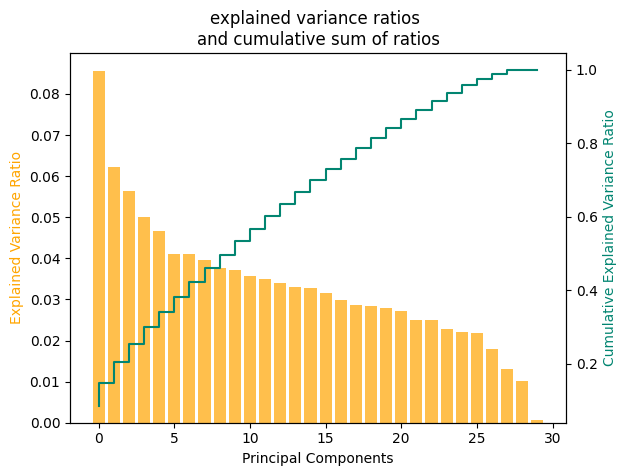

Number of PCA for 90% of the variance: 23


In [33]:
# Plot explained variance and cumulative sum of explained variance
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(np.arange(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, alpha=0.7, color='orange')
ax2.step(np.arange(len(pca.explained_variance_ratio_)), np.cumsum(pca.explained_variance_ratio_), c='#028571')
ax1.set_xlabel('Principal Components')
ax1.set_ylabel('Explained Variance Ratio', color='orange')
ax2.set_ylabel('Cumulative Explained Variance Ratio', color='#028571')
plt.title('explained variance ratios \nand cumulative sum of ratios')
plt.show()

# Print how many pca is needed for 90% of the variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_pca = np.argmax(cumulative_variance >= 0.9)
print(f'Number of PCA for 90% of the variance: {n_pca}')

### Modelling

In [ ]:
pipeline = Pipeline([
    ('scaling', StandardScaler()),
    ('lda', LDA(n_components=2)),
    ('clf', LogisticRegression(solver='liblinear', multi_class='auto'))
])


### Final evaluation

### Kaggle submission